In [20]:
from IPython.display import display, clear_output
import pandas as pd
from local_packages import * # local package

In [21]:
FILE_NAME = datasets_dropdown.value
FILE_PATH = f'{FOLDER_PATH}{FILE_NAME}'
FILE_PATH

'datasets/smoke_rings.csv'

In [22]:
def update_FILE_NAME():
    global FILE_NAME, FILE_PATH
    FILE_NAME = datasets_dropdown.get_interact_value()
    FILE_PATH = f'{FOLDER_PATH}{FILE_NAME}'
    
datasets_dropdown.on_trait_change(update_FILE_NAME)

In [31]:
display(datasets_dropdown)

Dropdown(description='Dataset:', index=5, layout=Layout(width='fit-content'), options=('nautillus.csv', 'two_m…

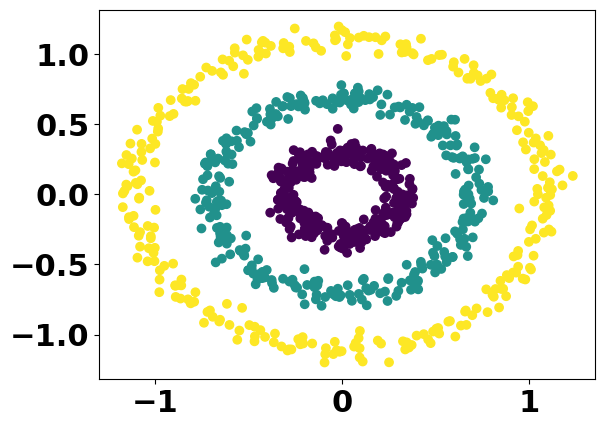

In [32]:
all_dots = pd.read_csv(FILE_PATH)
inspect_dataset(all_dots)

In [25]:
read_rows = fileDepth(FILE_PATH)
data_len  = fileWidth(FILE_PATH)
knn = 20
k = 3
print(f"Depth: {read_rows} | Width: {data_len}")

Depth: 300 | Width: 3


In [26]:
c = C(SO_FILE_PATH)
l = c.spectral(data_len, read_rows, FILE_PATH, knn, k_clusters=k)
m = c.kmeans(data_len, read_rows, FILE_PATH, k_clusters=k)


REQ_DATA_LEN: 3 	TRU_DATA_LEN: 3
REQ_N_ROWS  : 300 	TRU_N_ROWS  : 300+1

ORIGINAL DATASET: (x,y,target)
0	0.963573 -0.186096 0.000000 
1	0.392897 0.278983 1.000000 
2	0.737376 -0.569093 0.000000 
3	-0.280199 1.002163 0.000000 
4	-0.932533 0.026078 0.000000 
5	0.463843 -0.308207 1.000000 
6	0.887321 -0.395168 0.000000 
7	1.043974 -0.330201 0.000000 
300x3 matrix. 8x3 printed.

k of clusters: 3

TRIMMED DATASET: (x,y)
0	0.963573 -0.186096 
1	0.392897 0.278983 
2	0.737376 -0.569093 
3	-0.280199 1.002163 
4	-0.932533 0.026078 
5	0.463843 -0.308207 
6	0.887321 -0.395168 
7	1.043974 -0.330201 
300x2 matrix. 8x2 printed.

DISTANCES MATRIX:
0	0.000000 1.035755 0.609193 2.432031 2.108281 0.621840 0.285324 0.224506 
1	1.035755 0.000000 1.192556 1.396276 1.578334 0.658135 1.168575 1.260261 
2	0.609193 1.192556 0.000000 2.588831 2.265082 0.534420 0.323869 0.545490 
3	2.432031 1.396276 2.588831 0.000000 1.628419 2.054411 2.564850 2.656537 
4	2.108281 1.578334 2.265082 1.628419 0.000000 1.730661 2.

In [27]:
all_dots = readCsv(FILE_PATH, read_rows)

cls = [int(dot[2]) for dot in all_dots]
cls_set = set(cls)
x = [dot[0] for dot in all_dots]
y = [dot[1] for dot in all_dots]

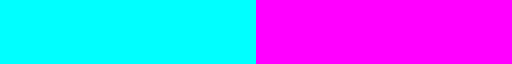

In [28]:
cool_resampled = mpl.colormaps['cool'].resampled(len(cls_set))
cool_resampled

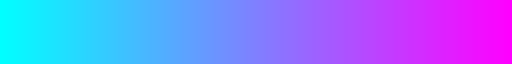

In [29]:
cool = mpl.colormaps['cool']
cool

Dots colored black have no assigned cluster.


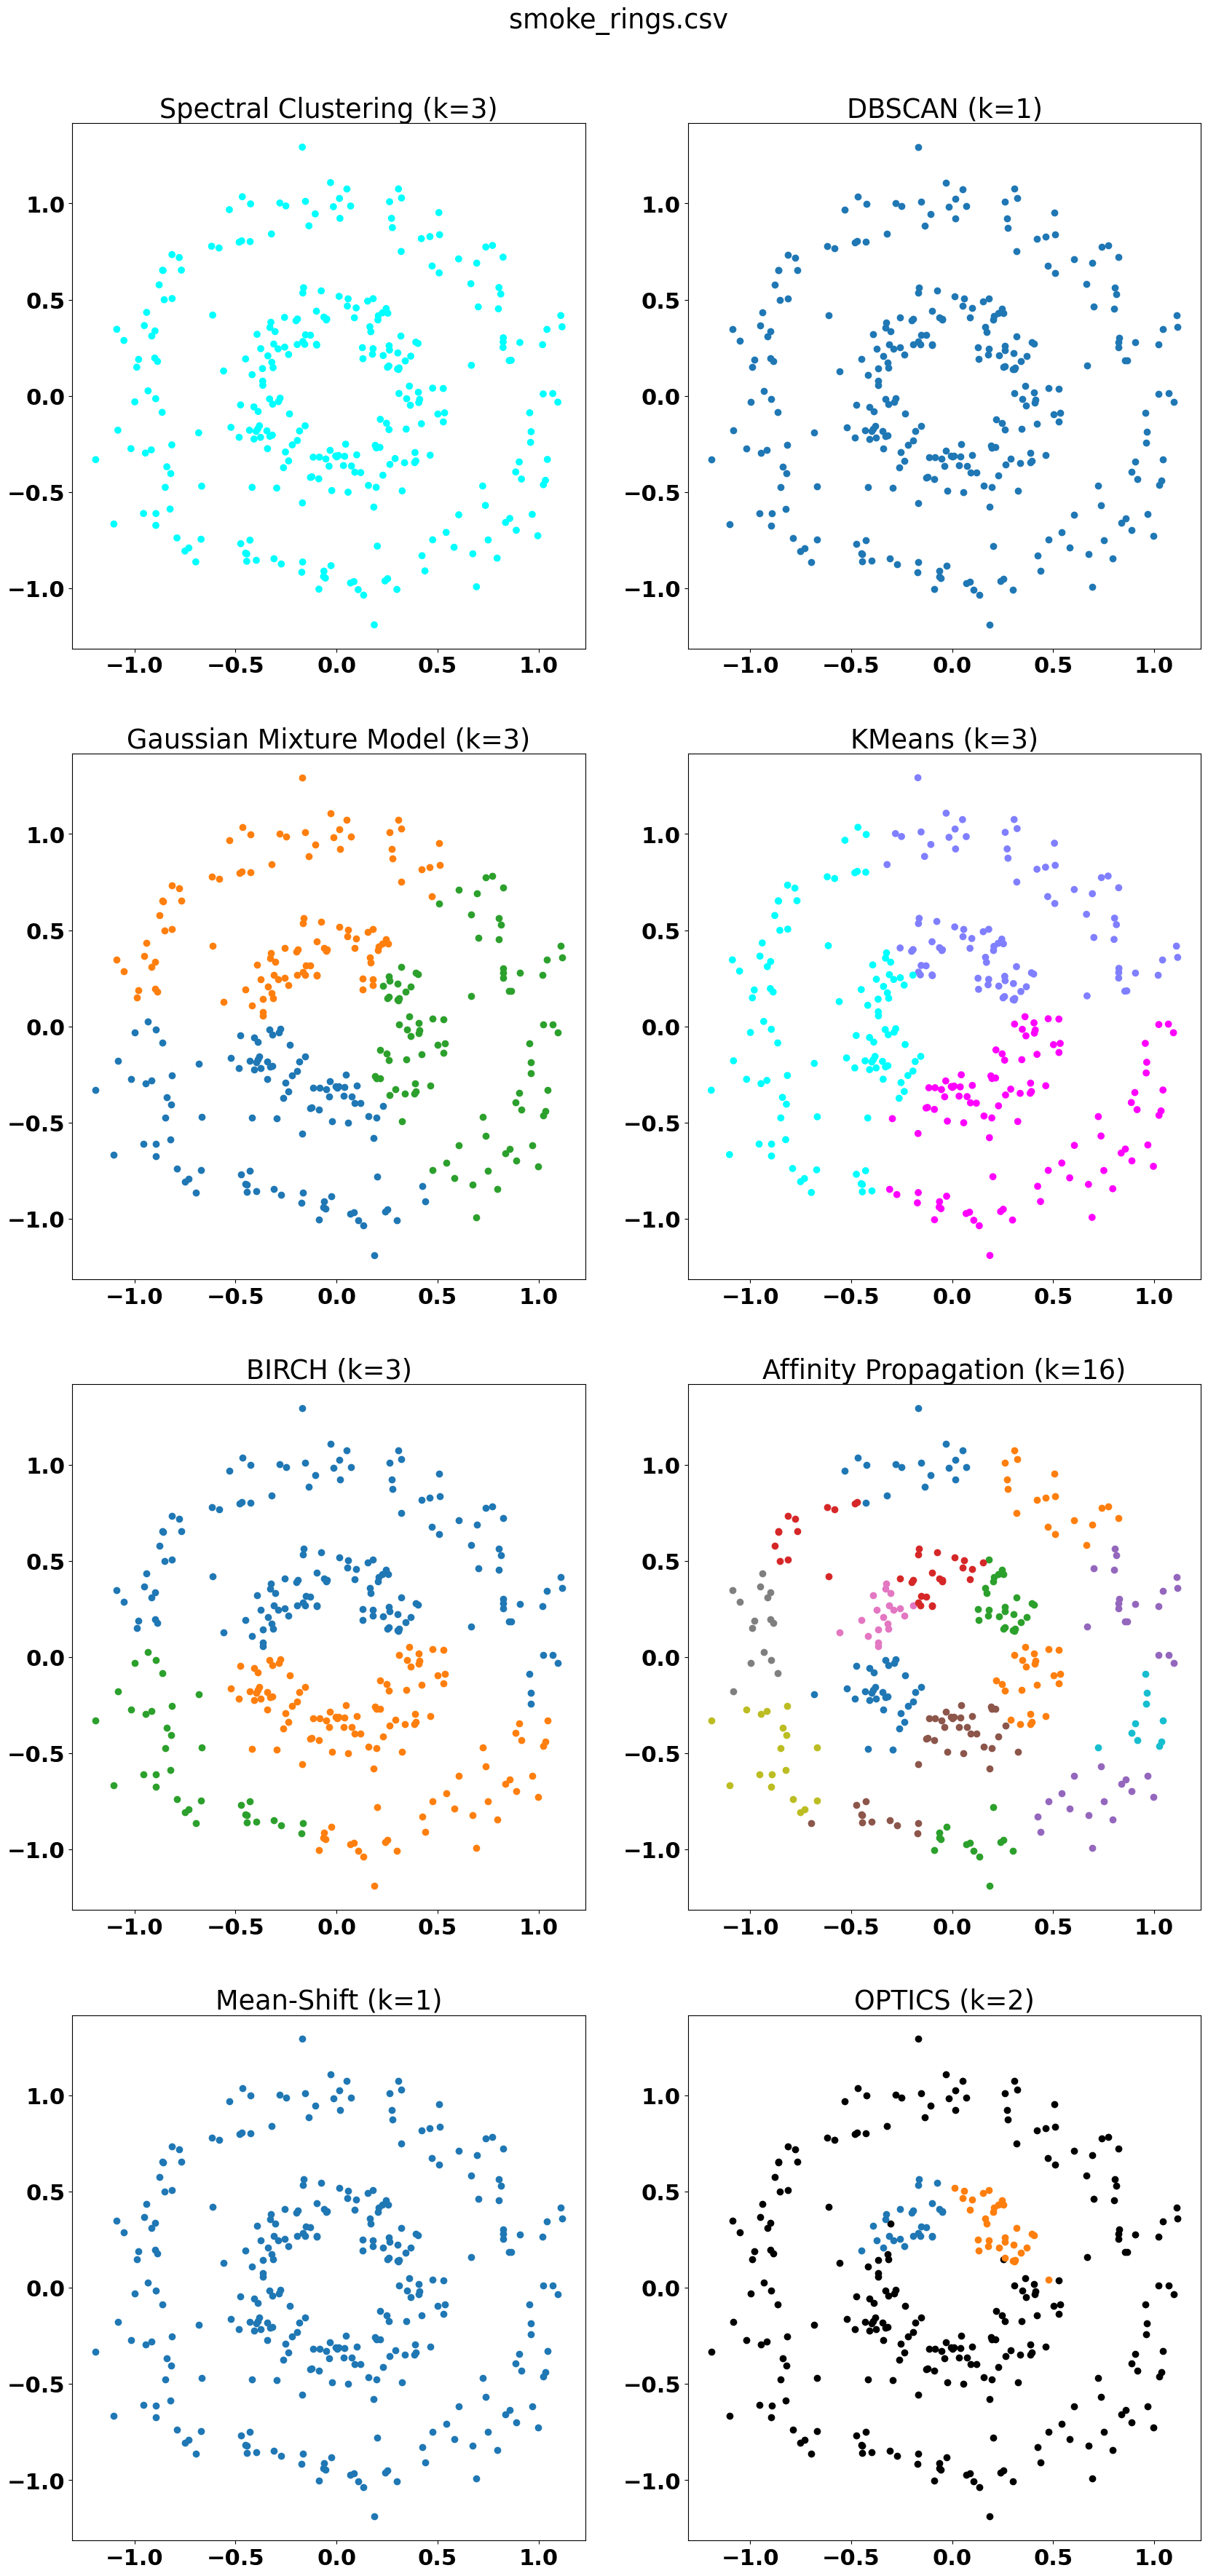

In [30]:
print("Dots colored black have no assigned cluster.")
fig, axis = setupMPL(FILE_NAME, COLS, ROWS, list(cls_set), cool_resampled)

l_spectral = l
plotSPECTRAL(fig, axis, 0,0, x,y, l_spectral, cool, f"Spectral Clustering (k={k})")

l_dbscan = dbscan(all_dots, eps=2.5, min_samples=knn) # no need for number of clusters (k)
k_dbscan = k_clusters(l_dbscan)
plotDBSCAN(fig, axis, 0,1, x,y, l_dbscan, all_dots, f"DBSCAN (k={k_dbscan})")

l_gaussian = gaussian(all_dots, k=k)
plotGaussian(fig, axis, 1,0, x,y, l_gaussian, all_dots, f"Gaussian Mixture Model (k={k})")

l_kmeans = m
plotKMEANS(fig, axis, 1,1, x,y, l_kmeans, cool, f"KMeans (k={k})")

l_birch = birch(all_dots, threshold=0.03, n=k)
plotBIRCH(fig, axis, 2,0, x,y, l_birch, all_dots, f"BIRCH (k={k})")

l_affinity = affinity(all_dots, 0.7) # no need for number of clusters (k)
k_affinity = k_clusters(l_affinity)
plotAffinity(fig, axis, 2,1, x,y, l_affinity, all_dots, f"Affinity Propagation (k={k_affinity})")

l_mean = mean(all_dots) # no need for number of clusters (k) | bad on large scale datasets
k_mean = k_clusters(l_mean)
plotMEAN(fig, axis, 3,0, x,y, l_mean, all_dots, f"Mean-Shift (k={k_mean})")

l_optics = optics(all_dots, eps=0.5, min_samples=25) # no need for number of clusters (k)
k_optics = k_clusters(l_optics)
plotOPTICS(fig, axis, 3,1, x,y, l_optics, all_dots, f"OPTICS (k={k_optics})")
plt.show()